In [1]:
import pandas as pd
import os
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# SET WORK DERC

#### For my Mac
# os.chdir('//Users//patricklee//Desktop//파이썬//DACON//2020DACON_CUP') 

### For my Desktop
os.chdir('C://Users//BIS_COM//data//dacon//2020')

In [2]:
train_df = pd.read_csv(r'./train.csv',encoding='cp949',parse_dates=['DateTime'])
login_df = pd.read_csv(r'./info_login.csv',index_col=0,parse_dates=['c_time'])
user_df = pd.read_csv(r'./info_user.csv',index_col=0,parse_dates=['c_time'])
compe_df = pd.read_csv(r'./info_competition.csv',encoding='cp949',index_col=0)
sub_df = pd.read_csv(r'./info_submission.csv',encoding='cp949',index_col=0)

C:\Users\BIS_COM\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
all_data = [train_df,login_df,user_df,compe_df,sub_df]
just_data = [login_df,user_df,compe_df]
user_data = [user_df,login_df]

In [4]:
# login_df['c_time'] = pd.to_datetime(login_df['c_time'],format='%Y-%m-%d %H:')
# user_df['c_time'] = pd.to_datetime(user_df['c_time'],format='%Y-%m-%d %H')
# compe_df['period_start'] = pd.to_datetime(compe_df['period_start'],format='%Y-%m-%d %H')
# compe_df['period_end'] = pd.to_datetime(compe_df['period_end'],format='%Y-%m-%d %H')
# train_df['DateTime'] = pd.to_datetime(train_df['DateTime'],format='%Y-%m-%d %H')

In [5]:
user_df

,id,c_time,entered_competition_cnt,code_share_cnt,talk_board_cnt,country_code,python_level,ds_level
0.0,15994.0,2017-05-02 23:58:00,94.0,306.0,477.0,82.0,1.0,1.0
1.0,19195.0,2018-08-08 18:21:00,1.0,0.0,0.0,82.0,1.0,1.0
2.0,16339.0,2018-08-08 19:57:00,1.0,0.0,0.0,82.0,1.0,1.0
3.0,7290.0,2018-08-08 19:59:00,0.0,0.0,0.0,82.0,1.0,1.0
4.0,21287.0,2018-08-08 20:26:00,0.0,0.0,0.0,82.0,1.0,1.0
...,...,...,...,...,...,...,...,...
NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
user_df = user_df.dropna()
login_df = login_df.dropna()

In [7]:
user_df['c_time'] = user_df['c_time'].apply(lambda x : datetime.strftime(x,'%Y-%m-%d %H'))
login_df['c_time'] = login_df['c_time'].apply(lambda x : datetime.strftime(x,'%Y-%m-%d %H'))

<ipython-input-7-9e0166b1e521>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['c_time'] = user_df['c_time'].apply(lambda x : datetime.strftime(x,'%Y-%m-%d %H'))
<ipython-input-7-9e0166b1e521>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  login_df['c_time'] = login_df['c_time'].apply(lambda x : datetime.strftime(x,'%Y-%m-%d %H'))


In [8]:
user_df['c_time'] = pd.to_datetime(user_df['c_time'])
login_df['c_time'] = pd.to_datetime(login_df['c_time'])

<ipython-input-8-d383d69fa106>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['c_time'] = pd.to_datetime(user_df['c_time'])
<ipython-input-8-d383d69fa106>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  login_df['c_time'] = pd.to_datetime(login_df['c_time'])


In [9]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 21692 entries, 0.0 to 21691.0
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       21692 non-null  float64       
 1   c_time                   21692 non-null  datetime64[ns]
 2   entered_competition_cnt  21692 non-null  float64       
 3   code_share_cnt           21692 non-null  float64       
 4   talk_board_cnt           21692 non-null  float64       
 5   country_code             21692 non-null  float64       
 6   python_level             21692 non-null  float64       
 7   ds_level                 21692 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 1.5 MB


In [10]:
login_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 60397 entries, 0.0 to 64653.0
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   login_id  60397 non-null  float64       
 1   user_id   60397 non-null  float64       
 2   c_time    60397 non-null  datetime64[ns]
 3   platform  60397 non-null  object        
 4   browser   60397 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 2.8+ MB


# User Data Reshape

In [11]:
user_df.sort_values(by='c_time',axis=0)
user_df

,id,c_time,entered_competition_cnt,code_share_cnt,talk_board_cnt,country_code,python_level,ds_level
0.0,15994.0,2017-05-02 23:00:00,94.0,306.0,477.0,82.0,1.0,1.0
1.0,19195.0,2018-08-08 18:00:00,1.0,0.0,0.0,82.0,1.0,1.0
2.0,16339.0,2018-08-08 19:00:00,1.0,0.0,0.0,82.0,1.0,1.0
3.0,7290.0,2018-08-08 19:00:00,0.0,0.0,0.0,82.0,1.0,1.0
4.0,21287.0,2018-08-08 20:00:00,0.0,0.0,0.0,82.0,1.0,1.0
...,...,...,...,...,...,...,...,...
21687.0,11584.0,2020-12-08 22:00:00,1.0,0.0,0.0,82.0,1.0,1.0
21688.0,6337.0,2020-12-08 22:00:00,1.0,0.0,0.0,82.0,1.0,1.0
21689.0,2505.0,2020-12-08 23:00:00,1.0,0.0,0.0,82.0,1.0,1.0
21690.0,14182.0,2020-12-08 23:00:00,1.0,0.0,0.0,82.0,1.0,1.0


In [12]:
user_df.isnull().sum()

id                         0
c_time                     0
entered_competition_cnt    0
code_share_cnt             0
talk_board_cnt             0
country_code               0
python_level               0
ds_level                   0
dtype: int64

In [13]:
user_df.shape

(21692, 8)

# Login Data reshape

In [14]:
login_df.isnull().sum()

login_id    0
user_id     0
c_time      0
platform    0
browser     0
dtype: int64

In [15]:
login_df.sort_values('c_time')

,login_id,user_id,c_time,platform,browser
0.0,14196.0,19195.0,2018-09-23 01:00:00,Windows 8,Internet Explorer 10.0
1.0,14234.0,22045.0,2018-09-23 02:00:00,Windows,Chrome 67.0.3396.99
2.0,14256.0,8790.0,2018-09-23 03:00:00,Windows,Chrome 69.0.3497.100
5.0,14280.0,10206.0,2018-09-23 13:00:00,Windows,Chrome 68.0.3440.106
6.0,14288.0,488.0,2018-09-23 14:00:00,Windows 7,Chrome 68.0.3440.106
...,...,...,...,...,...
64648.0,328193.0,12349.0,2019-12-30 23:00:00,Windows,Chrome 79.0.3945.88
64649.0,328208.0,16088.0,2019-12-30 23:00:00,Windows,Firefox 71.0
64650.0,328209.0,14107.0,2019-12-30 23:00:00,Windows,Chrome 79.0.3945.88
64651.0,328210.0,1283.0,2019-12-30 23:00:00,Windows,Chrome 79.0.3945.88


# New Data Tabel

In [16]:
user_df.columns

Index(['id', 'c_time', 'entered_competition_cnt', 'code_share_cnt',
       'talk_board_cnt', 'country_code', 'python_level', 'ds_level'],
      dtype='object')

In [17]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 21692 entries, 0.0 to 21691.0
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       21692 non-null  float64       
 1   c_time                   21692 non-null  datetime64[ns]
 2   entered_competition_cnt  21692 non-null  float64       
 3   code_share_cnt           21692 non-null  float64       
 4   talk_board_cnt           21692 non-null  float64       
 5   country_code             21692 non-null  float64       
 6   python_level             21692 non-null  float64       
 7   ds_level                 21692 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 1.5 MB


In [18]:
pv_user_df1 = pd.pivot_table(user_df, index='c_time',values=['id'],aggfunc='count')

In [19]:
pv_user_df1

,id
c_time,
2017-05-02 23:00:00,1
2018-08-08 18:00:00,1
2018-08-08 19:00:00,2
2018-08-08 20:00:00,2
2018-08-08 21:00:00,1
...,...
2020-12-08 19:00:00,4
2020-12-08 20:00:00,3
2020-12-08 21:00:00,2


In [20]:
pv_user_df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8612 entries, 2017-05-02 23:00:00 to 2020-12-08 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      8612 non-null   int64
dtypes: int64(1)
memory usage: 134.6 KB


In [21]:
pv_user_df2 = pd.pivot_table(user_df, index='c_time',values=['ds_level'],aggfunc='mean')

In [22]:
pv_user_df2

,ds_level
c_time,
2017-05-02 23:00:00,1.0
2018-08-08 18:00:00,1.0
2018-08-08 19:00:00,1.0
2018-08-08 20:00:00,1.0
2018-08-08 21:00:00,1.0
...,...
2020-12-08 19:00:00,1.0
2020-12-08 20:00:00,1.0
2020-12-08 21:00:00,1.0


In [23]:
pv_user_df3 = pd.pivot_table(user_df, index='c_time',values=['country_code'],aggfunc='nunique')

In [24]:
pv_user_df3

,c_time,country_code
c_time,,
2017-05-02 23:00:00,1,1
2018-08-08 18:00:00,1,1
2018-08-08 19:00:00,1,1
2018-08-08 20:00:00,1,1
2018-08-08 21:00:00,1,1
...,...,...
2020-12-08 19:00:00,1,1
2020-12-08 20:00:00,1,1
2020-12-08 21:00:00,1,1


In [25]:
pv_user_df3 = pv_user_df3.drop(axis=1,columns='c_time')

In [26]:
new_user_df = pd.merge(pv_user_df1, pv_user_df2, how='outer',on='c_time')

In [27]:
new_user_df

,id,ds_level
c_time,,
2017-05-02 23:00:00,1,1.0
2018-08-08 18:00:00,1,1.0
2018-08-08 19:00:00,2,1.0
2018-08-08 20:00:00,2,1.0
2018-08-08 21:00:00,1,1.0
...,...,...
2020-12-08 19:00:00,4,1.0
2020-12-08 20:00:00,3,1.0
2020-12-08 21:00:00,2,1.0


In [28]:
new_user_df = pd.merge(new_user_df, pv_user_df3, how='outer',on='c_time')

In [29]:
new_user_df

,id,ds_level,country_code
c_time,,,
2017-05-02 23:00:00,1,1.0,1
2018-08-08 18:00:00,1,1.0,1
2018-08-08 19:00:00,2,1.0,1
2018-08-08 20:00:00,2,1.0,1
2018-08-08 21:00:00,1,1.0,1
...,...,...,...
2020-12-08 19:00:00,4,1.0,1
2020-12-08 20:00:00,3,1.0,1
2020-12-08 21:00:00,2,1.0,1


### login data new values

In [30]:
pv_user_df1 = pd.pivot_table(login_df, index='c_time',values=['user_id'],aggfunc='count')

In [31]:
pv_user_df1

,user_id
c_time,
2018-09-23 01:00:00,1
2018-09-23 02:00:00,1
2018-09-23 03:00:00,1
2018-09-23 13:00:00,1
2018-09-23 14:00:00,5
...,...
2019-12-30 19:00:00,13
2019-12-30 20:00:00,18
2019-12-30 21:00:00,12


In [32]:
pv_user_df2 = pd.pivot_table(login_df, index='c_time',values=['platform','browser','user_id'],aggfunc='nunique')
pv_user_df2

,browser,c_time,platform,user_id
c_time,,,,
2018-09-23 01:00:00,1,1,1,1
2018-09-23 02:00:00,1,1,1,1
2018-09-23 03:00:00,1,1,1,1
2018-09-23 13:00:00,1,1,1,1
2018-09-23 14:00:00,4,1,4,4
...,...,...,...,...
2019-12-30 19:00:00,6,1,3,13
2019-12-30 20:00:00,2,1,5,16
2019-12-30 21:00:00,4,1,2,11


In [33]:
pv_user_df2 = pv_user_df2.drop(axis=1, columns='c_time')

In [34]:
new_login_df = pd.merge(pv_user_df1, pv_user_df2, how='outer',on='c_time')
new_login_df.tail()

,user_id_x,browser,platform,user_id_y
c_time,,,,
2019-12-30 19:00:00,13,6,3,13
2019-12-30 20:00:00,18,2,5,16
2019-12-30 21:00:00,12,4,2,11
2019-12-30 22:00:00,15,5,3,14
2019-12-30 23:00:00,7,4,2,7


In [35]:
new_login_df=new_login_df.rename({'user_id_x':'Total visit', 'user_id_y':'Total User'},axis='columns')

In [36]:
new_login_df

,Total visit,browser,platform,Total User
c_time,,,,
2018-09-23 01:00:00,1,1,1,1
2018-09-23 02:00:00,1,1,1,1
2018-09-23 03:00:00,1,1,1,1
2018-09-23 13:00:00,1,1,1,1
2018-09-23 14:00:00,5,4,4,4
...,...,...,...,...
2019-12-30 19:00:00,13,6,3,13
2019-12-30 20:00:00,18,2,5,16
2019-12-30 21:00:00,12,4,2,11


In [37]:
new_login_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8866 entries, 2018-09-23 01:00:00 to 2019-12-30 23:00:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Total visit  8866 non-null   int64
 1   browser      8866 non-null   int64
 2   platform     8866 non-null   int64
 3   Total User   8866 non-null   int64
dtypes: int64(4)
memory usage: 346.3 KB


In [38]:
new_user_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8612 entries, 2017-05-02 23:00:00 to 2020-12-08 23:00:00
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            8612 non-null   int64  
 1   ds_level      8612 non-null   float64
 2   country_code  8612 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 269.1 KB


In [39]:
new_value_df = pd.merge(new_user_df, new_login_df, how='outer',on='c_time')

In [40]:
new_value_df

,id,ds_level,country_code,Total visit,browser,platform,Total User
c_time,,,,,,,
2017-05-02 23:00:00,1.0,1.0,1.0,NaN,NaN,NaN,NaN
2018-08-08 18:00:00,1.0,1.0,1.0,NaN,NaN,NaN,NaN
2018-08-08 19:00:00,2.0,1.0,1.0,NaN,NaN,NaN,NaN
2018-08-08 20:00:00,2.0,1.0,1.0,NaN,NaN,NaN,NaN
2018-08-08 21:00:00,1.0,1.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-12-30 07:00:00,NaN,NaN,NaN,1.0,1.0,1.0,1.0
2019-12-30 08:00:00,NaN,NaN,NaN,7.0,3.0,3.0,6.0
2019-12-30 12:00:00,NaN,NaN,NaN,16.0,5.0,4.0,16.0


# Missing Value

In [41]:
new_value_df.isnull().sum()

id              5625
ds_level        5625
country_code    5625
Total visit     5371
browser         5371
platform        5371
Total User      5371
dtype: int64

In [42]:
new_value_df = new_value_df.fillna(-99)

In [43]:
new_value_df

,id,ds_level,country_code,Total visit,browser,platform,Total User
c_time,,,,,,,
2017-05-02 23:00:00,1.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0
2018-08-08 18:00:00,1.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0
2018-08-08 19:00:00,2.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0
2018-08-08 20:00:00,2.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0
2018-08-08 21:00:00,1.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0
...,...,...,...,...,...,...,...
2019-12-30 07:00:00,-99.0,-99.0,-99.0,1.0,1.0,1.0,1.0
2019-12-30 08:00:00,-99.0,-99.0,-99.0,7.0,3.0,3.0,6.0
2019-12-30 12:00:00,-99.0,-99.0,-99.0,16.0,5.0,4.0,16.0


In [44]:
train_df=train_df.rename({'DateTime':'c_time'},axis='columns')

In [45]:
train_df

,c_time,사용자,세션,신규방문자,페이지뷰
0,2018-09-09 00:00:00,19,19,8,206
1,2018-09-09 01:00:00,20,19,9,259
2,2018-09-09 02:00:00,12,9,1,48
3,2018-09-09 03:00:00,10,10,2,102
4,2018-09-09 04:00:00,6,5,3,18
...,...,...,...,...,...
19003,2020-11-08 19:00:00,124,123,19,3128
19004,2020-11-08 20:00:00,166,159,29,4864
19005,2020-11-08 21:00:00,184,173,32,3426
19006,2020-11-08 22:00:00,163,155,34,2845


In [46]:
train = pd.merge(new_value_df, train_df,how="outer",on="c_time")

In [47]:
# train = train.fillna(0)

In [48]:
train

,c_time,id,ds_level,country_code,Total visit,browser,platform,Total User,사용자,세션,신규방문자,페이지뷰
0,2017-05-02 23:00:00,1.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,NaN,NaN,NaN,NaN
1,2018-08-08 18:00:00,1.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,NaN,NaN,NaN,NaN
2,2018-08-08 19:00:00,2.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,NaN,NaN,NaN,NaN
3,2018-08-08 20:00:00,2.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,NaN,NaN,NaN,NaN
4,2018-08-08 21:00:00,1.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19781,2020-11-08 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,16.0,7.0,170.0
19782,2020-11-08 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,15.0,3.0,157.0
19783,2020-11-08 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,46.0,11.0,640.0
19784,2020-11-08 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.0,129.0,28.0,1843.0


In [49]:
train_df = train.dropna()
train_df.shape

(13459, 12)

In [50]:
train_df

,c_time,id,ds_level,country_code,Total visit,browser,platform,Total User,사용자,세션,신규방문자,페이지뷰
266,2018-09-09 01:00:00,1.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,20.0,19.0,9.0,259.0
267,2018-09-09 03:00:00,1.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,10.0,10.0,2.0,102.0
268,2018-09-09 13:00:00,3.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,20.0,16.0,7.0,131.0
269,2018-09-09 18:00:00,1.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,13.0,12.0,2.0,47.0
270,2018-09-09 21:00:00,2.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,17.0,17.0,7.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14232,2019-12-30 07:00:00,-99.0,-99.0,-99.0,1.0,1.0,1.0,1.0,12.0,14.0,3.0,72.0
14233,2019-12-30 08:00:00,-99.0,-99.0,-99.0,7.0,3.0,3.0,6.0,29.0,29.0,5.0,274.0
14234,2019-12-30 12:00:00,-99.0,-99.0,-99.0,16.0,5.0,4.0,16.0,58.0,59.0,18.0,624.0
14235,2019-12-30 15:00:00,-99.0,-99.0,-99.0,36.0,7.0,5.0,34.0,100.0,100.0,28.0,1196.0


In [51]:
# train=train.sort_values(by='c_time') # 19040
train.iloc[19039:]

,c_time,id,ds_level,country_code,Total visit,browser,platform,Total User,사용자,세션,신규방문자,페이지뷰
19039,2020-08-16 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,0.0,193.0
19040,2020-08-16 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,15.0,5.0,262.0
19041,2020-08-16 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,8.0,2.0,66.0
19042,2020-08-16 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,12.0,6.0,190.0
19043,2020-08-16 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,17.0,9.0,278.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19781,2020-11-08 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,16.0,7.0,170.0
19782,2020-11-08 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,15.0,3.0,157.0
19783,2020-11-08 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,46.0,11.0,640.0
19784,2020-11-08 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.0,129.0,28.0,1843.0


In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19786 entries, 0 to 19785
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   c_time        19786 non-null  datetime64[ns]
 1   id            14237 non-null  float64       
 2   ds_level      14237 non-null  float64       
 3   country_code  14237 non-null  float64       
 4   Total visit   14237 non-null  float64       
 5   browser       14237 non-null  float64       
 6   platform      14237 non-null  float64       
 7   Total User    14237 non-null  float64       
 8   사용자           19008 non-null  float64       
 9   세션            19008 non-null  float64       
 10  신규방문자         19008 non-null  float64       
 11  페이지뷰          19008 non-null  float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 2.0 MB


In [53]:
train = train.set_index("c_time")

In [54]:
train.head()

,id,ds_level,country_code,Total visit,browser,platform,Total User,사용자,세션,신규방문자,페이지뷰
c_time,,,,,,,,,,,
2017-05-02 23:00:00,1.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,NaN,NaN,NaN,NaN
2018-08-08 18:00:00,1.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,NaN,NaN,NaN,NaN
2018-08-08 19:00:00,2.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,NaN,NaN,NaN,NaN
2018-08-08 20:00:00,2.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,NaN,NaN,NaN,NaN
2018-08-08 21:00:00,1.0,1.0,1.0,-99.0,-99.0,-99.0,-99.0,NaN,NaN,NaN,NaN


# Simple DNN

In [96]:
import tensorflow as tf
from keras import layers, models

rate = 0.2
rate_size = int(len(train_df) * rate)

train = train_df[:-rate_size]
test = train_df[-rate_size:]

In [97]:
x_col = train.columns[1:8]
y_col = train.columns[8:]
print(x_col, y_col)

Index(['id', 'ds_level', 'country_code', 'Total visit', 'browser', 'platform',
       'Total User'],
      dtype='object') Index(['사용자', '세션', '신규방문자', '페이지뷰'], dtype='object')


In [98]:
x_train = train[x_col]
y_train = train[y_col]

In [99]:
x_train.shape

(10768, 7)

In [107]:
def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu',
                           input_shape=(7,)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(4))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [108]:
import numpy as np
from sklearn import preprocessing, metrics
from sklearn.model_selection import KFold, TimeSeriesSplit

n_fold = 4
folds = TimeSeriesSplit(n_splits=n_fold)
splits = folds.split(train)

num_epochs = 100
all_mae_histories = []

for fold_n, (train_index, valid_index) in enumerate(splits):
    print('Fold:',fold_n+1)
    X_train1, X_valid1 = x_train[x_col].iloc[train_index], x_train[x_col].iloc[valid_index]
    y_train1, y_valid1 = y_train.iloc[train_index], y_train.iloc[valid_index]
    model = build_model()
    history = model.fit(X_train1, y_train1,
                    validation_data=(X_valid1, y_valid1),
                    epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

Fold: 1
Fold: 2
Fold: 3
Fold: 4


In [109]:
all_mae_histories

[[372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567871094,
  372.2244567

In [110]:
np.mean(all_mae_histories)

466.7665796279907

In [111]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

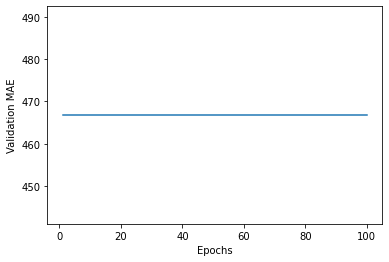

In [112]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

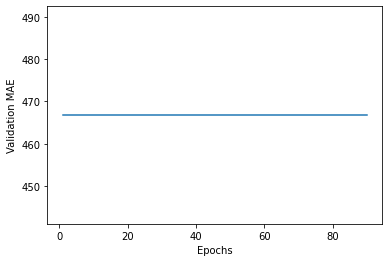

In [113]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()